(297, 14)


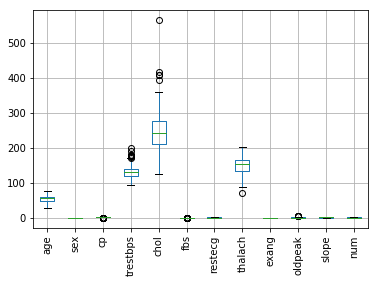

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



hd = pd.read_csv('cleveland.csv')
hd.dropna(inplace=True)
hd = hd[hd.ca != '?']
hd = hd[hd.thal != '?']
print(hd.shape)
hd.boxplot()
plt.xticks(rotation = 90)
plt.show()


(282, 14)


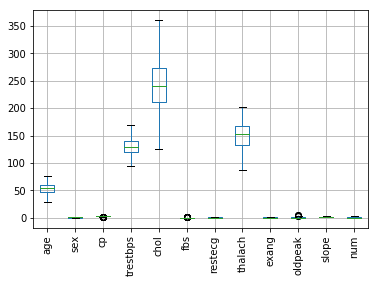

In [29]:
def remove_outliers(hd, cols):
    for col in cols:
        Q3 = hd[col].quantile(.75)
        Q1 = hd[col].quantile(.25)
        IQR = Q3 - Q1
        hd = hd[~((hd[col] < Q1 - 1.5 * IQR) | (hd[col] > Q3 + 1.5 * IQR))]
    return hd

hd = remove_outliers(hd, ['trestbps', 'chol', 'thalach'])
print(hd.shape)
hd.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [30]:
#Shuffling the data
print(hd.head())
hd = hd.sample(frac=1, random_state=41).reset_index(drop=True)
print(hd.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0   
1  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
2  54.0  0.0  2.0     132.0  288.0  1.0      2.0    159.0    1.0      0.0   
3  64.0  0.0  4.0     130.0  303.0  0.0      0.0    122.0    0.0      2.0

In [31]:
#num: 1, 2, 3 = 1
hd['num'][hd['num'] != 0] = 1
# hd['num']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
#discretize the data (get_dummies)
hd = pd.get_dummies(hd, columns=['cp', 'restecg', 'slope', 'ca', 'thal' ], drop_first=False)
hd.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,56.0,1.0,120.0,240.0,0.0,169.0,0.0,0.0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,57.0,1.0,124.0,261.0,0.0,141.0,0.0,0.3,1,0,...,1,0,0,1,0,0,0,0,0,1
2,54.0,0.0,132.0,288.0,1.0,159.0,1.0,0.0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,64.0,0.0,130.0,303.0,0.0,122.0,0.0,2.0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,44.0,0.0,118.0,242.0,0.0,149.0,0.0,0.3,0,0,...,0,1,0,0,1,0,0,1,0,0


In [33]:
#standardize the data
from sklearn import preprocessing
col_to_norm = hd.columns.tolist()
col_to_norm.remove('num')
hd[col_to_norm] = preprocessing.StandardScaler().fit_transform(hd[col_to_norm])
hd.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.197782,0.662401,-0.644994,-0.071682,-0.394636,0.849275,-0.684653,-0.899318,0,-0.290887,...,-0.958315,-0.911685,3.720498,0.842075,-0.536350,-0.376431,-0.268781,0.885895,-0.261116,-0.776062
1,0.308009,0.662401,-0.388813,0.393778,-0.394636,-0.383423,-0.684653,-0.635419,1,-0.290887,...,1.043498,-0.911685,-0.268781,0.842075,-0.536350,-0.376431,-0.268781,-1.128802,-0.261116,1.288556
2,-0.022671,-1.509659,0.123548,0.992225,2.533980,0.409026,1.460593,-0.899318,0,-0.290887,...,1.043498,-0.911685,-0.268781,-1.187542,1.864454,-0.376431,-0.268781,0.885895,-0.261116,-0.776062
3,1.079595,-1.509659,-0.004542,1.324696,-0.394636,-1.219897,-0.684653,0.860014,0,-0.290887,...,-0.958315,1.096871,-0.268781,-1.187542,-0.536350,2.656528,-0.268781,0.885895,-0.261116,-0.776062
4,-1.124936,-1.509659,-0.773084,-0.027352,-0.394636,-0.031223,-0.684653,-0.635419,0,-0.290887,...,-0.958315,1.096871,-0.268781,-1.187542,1.864454,-0.376431,-0.268781,0.885895,-0.261116,-0.776062


In [34]:
#Which features are the most important (arrange them in descending order)
from sklearn.feature_selection import SelectKBest, f_regression

X = hd[col_to_norm].values.astype(np.float)
y = hd['num'].values.astype(np.float)
k_best = SelectKBest(f_regression, k=len(col_to_norm)).fit(X, y)
score = np.array(k_best.scores_)
rank = score.argsort()[-len(col_to_norm):][::-1]
features = []
for i in rank:
    features.append(col_to_norm[i])
print(features)

['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach', 'exang', 'slope_1.0', 'slope_2.0', 'sex', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'age', 'ca_3.0', 'restecg_0.0', 'restecg_2.0', 'trestbps', 'thal_6.0', 'chol', 'cp_1.0', 'slope_3.0', 'restecg_1.0', 'fbs']


In [38]:
#building custom model
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.neighbors import NearestNeighbors

def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def f1(y_true, y_pred):
    return f1_score(y_true, y_pred)

def knn(X_train, y_train, X_test, k):
    neigh = NearestNeighbors(n_neighbors=k).fit(X_train, y_train)
    y_pred_list = neigh.kneighbors(X_test, return_distance=False)
    y_pred = [[y_train[i] for i in indices] for indices in y_pred_list]
    # print(y_pred)
    y_pred = [max(y,key=y.count) for y in y_pred]
    return np.asarray(y_pred)

def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
    return out

def get_score(data, k, n):
    # print(data.shape)
    data_list = chunkIt(data, n)
    f1_list = []
    acc_list = []
    for i in range(n):
        data_split = data_list.copy()
        test = np.asarray(data_split.pop(i))
        train = np.asarray([j for k in data_split for j in k])
        X_train, y_train, X_test, y_test = train[:, :-1], train[:, -1], test[:, :-1], test[:, -1]
        y_pred = knn(X_train, y_train, X_test, k)
        f1_score = f1(y_test, y_pred)
        acc = accuracy(y_test, y_pred)
        f1_list.append(f1_score)
        acc_list.append(acc)
    return np.asarray(f1_list).mean().round(4), np.asarray(acc_list).mean().round(4)

In [39]:
import json
K = range(5, 15)
num_attr = range(15, 21)

score = {}
for n in num_attr:
    score[n] = {}
    feat = features[:n]
    feat.append('num')
#     print('N = {}: {}'.format(n, feat))
    hd1 = hd[feat]
    hd_data = hd1.values.astype(float)
    for k in K:
        score[n][k] = {}
        score[n][k]['f1'], score[n][k]['acc'] = get_score(hd_data, k, 8)
print(json.dumps(score, indent=4, sort_keys=True))

{
    "15": {
        "5": {
            "acc": 0.8228,
            "f1": 0.7958
        },
        "6": {
            "acc": 0.8227,
            "f1": 0.7966
        },
        "7": {
            "acc": 0.8368,
            "f1": 0.8165
        },
        "8": {
            "acc": 0.8369,
            "f1": 0.8148
        },
        "9": {
            "acc": 0.8334,
            "f1": 0.8137
        },
        "10": {
            "acc": 0.844,
            "f1": 0.8248
        },
        "11": {
            "acc": 0.8476,
            "f1": 0.8311
        },
        "12": {
            "acc": 0.8332,
            "f1": 0.8075
        },
        "13": {
            "acc": 0.8474,
            "f1": 0.8275
        },
        "14": {
            "acc": 0.8439,
            "f1": 0.8198
        }
    },
    "16": {
        "5": {
            "acc": 0.8368,
            "f1": 0.8141
        },
        "6": {
            "acc": 0.8368,
            "f1": 0.8167
        },
        "7": {
            "